In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

In [2]:
Genotype_between_phenotype = pd.read_csv("/Users/odedsabah/Desktop/Genotype_between_phenotype.csv")

In [8]:
Genotype_between_phenotype

,Unnamed: 0,s__Agathobacter_faecis:2,s__Agathobacter_rectale:1,s__Akkermansia_muciniphila:2,s__Alistipes_finegoldii:1,s__Alistipes_onderdonkii:1,s__Alistipes_putredinis:1,s__Alistipes_shahii:1,s__Alistipes_sp000434235:1,s__Anaerostipes_hadrus:1,...,s__Prevotella_sp002265625:1,s__Roseburia_intestinalis:1,s__Roseburia_inulinivorans:1,s__Sutterella_wadsworthensis_A:2,s__Sutterella_wadsworthensis_B:1,s__esco_HumanRef_tmp_v1.0.1_205,s__esco_HumanRef_tmp_v1.0.1_61,s__esco_HumanRef_tmp_v1.0.1_62,s__esco_HumanRef_tmp_v1.0.1_65,Diagnosis
0,CSM5MCVN,0.161290,0.776735,0.000000,0.250000,0.095238,0.264706,0.000000,0.000000,2.352941,...,23.416667,0.333333,0.100000,0.0,1.0,0.478495,0.000000,0.000000,0.000000,CD
1,CSM5MCW6,0.565744,0.666667,0.000000,0.090909,1.500000,0.333333,1.000000,5.777778,2.000000,...,4.000000,1.000000,0.649123,0.0,0.0,2.324324,8.000000,4.000000,1.000000,CD
2,CSM5MCWC,0.959489,0.145833,0.000000,0.000000,2.500000,0.666667,1.000000,0.000000,0.333333,...,0.000000,0.695385,0.090452,34.0,0.0,2.000000,0.129032,0.833333,0.400000,CD
3,CSM5MCWE,3.234795,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.588235,...,0.000000,0.957540,0.150000,0.0,0.0,1.312977,0.090909,0.000000,0.000000,CD
4,CSM5MCXD,0.152568,0.200000,1.288889,0.000000,0.000000,0.029412,0.000000,0.000000,0.664646,...,0.000000,0.200000,0.202740,0.0,0.0,0.156250,60.586207,10.285714,0.238095,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,PSM7J1A8,131.136364,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,...,0.000000,0.314020,0.647727,0.0,0.0,0.417526,1.000000,17.000000,0.000000,Control
737,PSMA265F,102.037037,0.021800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.312500,...,2.000000,0.414121,0.103099,0.0,0.0,0.360759,0.342642,10.064168,0.466197,Control
738,PSMA265H,4.853723,0.005077,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.495352,...,0.000000,0.151939,0.034139,0.0,0.0,1.241843,0.323699,7.340426,1.078624,Control
739,PSMA265J,0.605368,0.037965,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,2.350427,...,1.000000,0.195763,0.142202,0.0,0.0,0.873684,0.693472,15.436488,1.483092,Control


In [4]:
MTX_X = Genotype_between_phenotype.iloc[:,1:66]
MTX_y = Genotype_between_phenotype.iloc[:,-1]

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.33, random_state=42)


In [5]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

In [6]:
min_samples_split_DT = [3,4,5,6,7,8,9]
min_samples_leaf_DT = [3,4,5,6,7,8,9]
max_depth_DT = [3,4,5,6,7,8,9,10]
max_features_DT = ['sqrt', 'log2', None, 1, 2, 3, 4, 5]

parameters_DT = {'max_features':max_features_DT,
                'min_samples_split': min_samples_split_DT,
                 'max_depth': max_depth_DT,
                'min_samples_leaf': min_samples_leaf_DT
                }

DT_model = DecisionTreeClassifier(random_state = 0, class_weight="balanced")
DT_clf = GridSearchCV(DT_model, parameters_DT, cv=30, scoring='accuracy')
DT_clf.fit(X_train, y_train)

print("Best Model:")
DT_model = DT_clf.best_estimator_
print(DT_model)

DT_predictions = DT_model.predict(X_test)

# creating a confusion matrix
cm_DT = confusion_matrix(y_test, DT_predictions)
cm_DT


Best Model:
DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=5,
                       min_samples_leaf=3, min_samples_split=3, random_state=0)


array([[73, 24, 23],
       [27, 11, 12],
       [26, 10, 39]])

<AxesSubplot:>

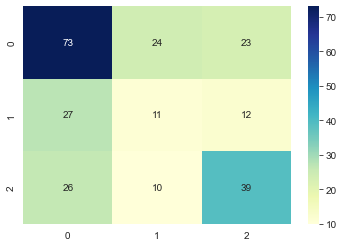

In [7]:
sns.heatmap(cm_DT,  cmap="YlGnBu", annot=True)

In [48]:
penalty_list_LR = ['l1','l2']
regularization_list_LR = [i for i in np.logspace(-4,2,15)]
parameters_LR = {'penalty':penalty_list_LR,
                'C': regularization_list_LR}

LR_model = LogisticRegression(class_weight = 'balanced')
LR_clf = GridSearchCV(LR_model, parameters_LR, cv=2, scoring="accuracy")

LR_model = LogisticRegression(random_state = 0, class_weight="balanced")
LR_clf = GridSearchCV(LR_model, parameters_LR, cv=2, scoring='accuracy')
LR_clf.fit(X_train, y_train)

print("Best Model:")
LR_model = LR_clf.best_estimator_
print(LR_model)

LR_predictions = LR_model.predict(X_test)

# creating a confusion matrix
cm_LR = confusion_matrix(y_test, LR_predictions)
cm_LR


Best Model:
LogisticRegression(C=0.2682695795279725, class_weight='balanced',
                   random_state=0)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.

array([[58, 29, 33],
       [ 7, 21, 22],
       [28, 17, 30]])

<AxesSubplot:>

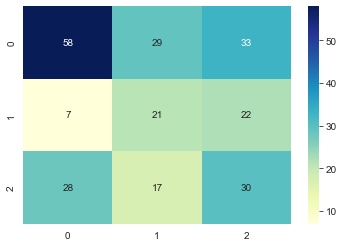

In [49]:
sns.heatmap(cm_LR, cmap="YlGnBu", annot=True)

In [50]:
penalty_list_SVM = ['l1','l2']
regularization_list_SVM = [i for i in np.logspace(-4,-1,15)]
parameters_SVM = {'penalty':penalty_list_SVM,
                'C': regularization_list_SVM}

SVM_model = LinearSVC(class_weight = 'balanced', multi_class="crammer_singer")
SVM_clf = GridSearchCV(SVM_model, parameters_SVM, cv=5, scoring="accuracy")

SVM_clf.fit(X_train, y_train)

print("Best Model:")
SVM_model = SVM_clf.best_estimator_
print(SVM_model)

SVM_predictions = SVM_model.predict(X_test)

# creating a confusion matrix
cm_SVM = confusion_matrix(y_test, SVM_predictions)
cm_SVM



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the numb

Best Model:
LinearSVC(C=0.022758459260747887, class_weight='balanced',
          multi_class='crammer_singer', penalty='l1')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the numb

array([[53, 31, 36],
       [11, 16, 23],
       [27, 17, 31]])

<AxesSubplot:>

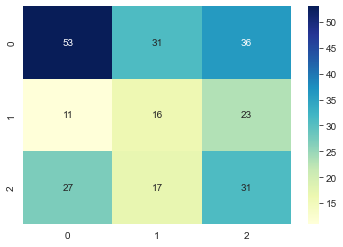

In [51]:
sns.heatmap(cm_SVM, cmap="YlGnBu", annot=True)

In [52]:
from sklearn.naive_bayes import GaussianNB

var_smooth_NB = [i for i in np.logspace(-12,-6,20)]

parameters_NB = {'var_smoothing':var_smooth_NB}

NB_model = GaussianNB()
NB_clf = GridSearchCV(NB_model, parameters_NB, cv=5, scoring="accuracy")

NB_clf.fit(X_train, y_train)

print("Best Model:")
NB_model = NB_clf.best_estimator_
print(NB_model)

NB_predictions = NB_model.predict(X_test)

# creating a confusion matrix
cm_NB = confusion_matrix(y_test, NB_predictions)
cm_NB

Best Model:
GaussianNB(var_smoothing=1e-12)


array([[24, 18, 78],
       [ 5, 10, 35],
       [ 5,  8, 62]])

<AxesSubplot:>

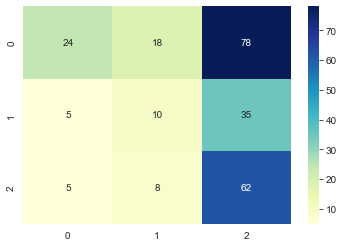

In [53]:
sns.heatmap(cm_NB, cmap="YlGnBu", annot=True)

In [54]:
nneighbors_KNN = [i+2 for i in range(10)]
weights_list_KNN = ['uniform', 'distance']
parameters_KNN = {'n_neighbors':nneighbors_KNN,
                'weights': weights_list_KNN}
KNN_model = KNeighborsClassifier()
KNN_clf = GridSearchCV(KNN_model, parameters_KNN, cv=5, scoring="accuracy")

KNN_clf.fit(X_train, y_train)

print("Best Model:")
KNN_model = KNN_clf.best_estimator_
print(KNN_model)

KNN_predictions = KNN_model.predict(X_test)

# creating a confusion matrix
cm_KNN = confusion_matrix(y_test, KNN_predictions)
cm_KNN



Best Model:
KNeighborsClassifier(n_neighbors=8, weights='distance')


array([[72, 26, 22],
       [22, 20,  8],
       [39, 14, 22]])

<AxesSubplot:>

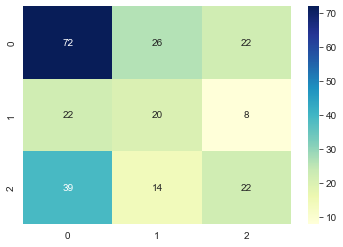

In [55]:
sns.heatmap(cm_KNN, cmap="YlGnBu", annot=True)

In [56]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [ None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=2, random_state=0)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring="accuracy")

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
cm_RF = confusion_matrix(y_test, RF_predictions)
cm_RF

Best Model:
RandomForestClassifier(max_features=None, n_estimators=1000, random_state=0)


array([[100,  14,   6],
       [ 17,  24,   9],
       [ 31,  11,  33]])

<AxesSubplot:>

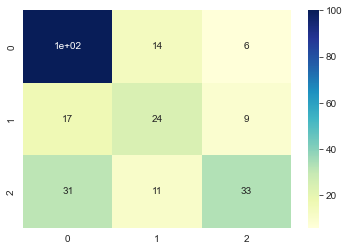

In [57]:
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

In [58]:
alpha_MLP = [i for i in 10.0 ** -np.arange(1,7)]
hidden_layer_sizes_MLP = [(10,10), (20,20), (40,40),
                     (10,20),(10,40),(20,10), (40,10)]
parameters_MLP = {'alpha': alpha_MLP,
                 'hidden_layer_sizes': hidden_layer_sizes_MLP}

MLP_model = MLPClassifier(solver='lbfgs',
                    random_state=1)
MLP_clf = GridSearchCV(MLP_model, parameters_MLP, cv=5, scoring="accuracy")

MLP_clf.fit(X_train, y_train)

print("Best Model:")
MLP_model = MLP_clf.best_estimator_
print(MLP_model)

MLP_predictions = MLP_model.predict(X_test)

# creating a confusion matrix
cm_MLP = confusion_matrix(y_test, MLP_predictions)
cm_MLP

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_mult

Best Model:
MLPClassifier(hidden_layer_sizes=(40, 10), random_state=1, solver='lbfgs')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([[73, 23, 24],
       [14, 23, 13],
       [33, 17, 25]])

<AxesSubplot:>

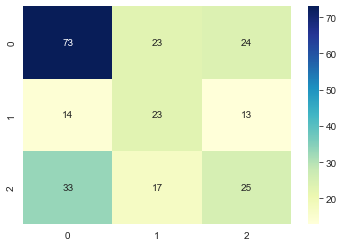

In [59]:
sns.heatmap(cm_MLP, cmap="YlGnBu", annot=True)

In [60]:
allclf_train = pd.DataFrame({'diagnosis':y_train})

allclf_train['DT'] = DT_clf.best_estimator_.predict(X_train)
allclf_train['KNN'] = KNN_clf.best_estimator_.predict(X_train)
allclf_train['SVC'] = SVM_clf.best_estimator_.predict(X_train)
allclf_train['LR'] = LR_clf.best_estimator_.predict(X_train)
allclf_train['RF'] = RF_clf.best_estimator_.predict(X_train)
allclf_train['MLP'] = MLP_clf.best_estimator_.predict(X_train)
allclf_train

,diagnosis,DT,KNN,SVC,LR,RF,MLP
114,CD,CD,CD,Control,Control,CD,CD
665,Control,Control,Control,Control,Control,Control,Control
721,Control,Control,Control,Control,Control,Control,Control
664,Control,Control,Control,Control,Control,Control,Control
423,UC,UC,UC,UC,UC,UC,UC
...,...,...,...,...,...,...,...
71,CD,UC,CD,UC,UC,CD,CD
106,CD,CD,CD,CD,CD,CD,CD
270,CD,CD,CD,Control,Control,CD,CD
435,UC,UC,UC,CD,CD,UC,UC


In [61]:
allclf_test = pd.DataFrame({'diagnosis':y_test})

allclf_test['DT'] = DT_clf.best_estimator_.predict(X_test)
allclf_test['KNN'] = KNN_clf.best_estimator_.predict(X_test)
allclf_test['SVC'] = SVM_clf.best_estimator_.predict(X_test)
allclf_test['LR'] = LR_clf.best_estimator_.predict(X_test)
allclf_test['RF'] = RF_clf.best_estimator_.predict(X_test)
allclf_test['MLP'] = MLP_clf.best_estimator_.predict(X_test)

In [62]:
allclf_train['Consensus'] = allclf_train[['DT', 'KNN', 'SVC', 'LR', 'RF', 'MLP']].mode(axis=1).iloc[:,0]
allclf_test['Consensus'] = allclf_test[['DT', 'KNN', 'SVC', 'LR', 'RF', 'MLP']].mode(axis=1).iloc[:,0]

In [63]:
cm_Consensus_train = confusion_matrix(y_train, allclf_train['Consensus'])
cm_Consensus_test = confusion_matrix(y_test, allclf_test['Consensus'])

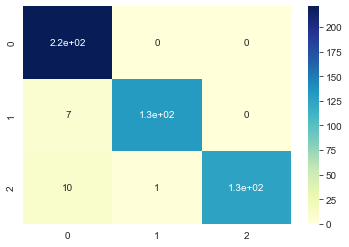

In [64]:
sns.heatmap(cm_Consensus_train, cmap="YlGnBu", annot=True)
plt.savefig("Consensus_Train.svg")

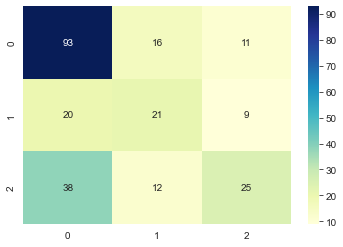

In [65]:
sns.heatmap(cm_Consensus_test, cmap="YlGnBu", annot=True)
plt.savefig("/Users/odedsabah/Desktop/Consensus_Test.svg")

In [66]:
allclf_test.shape

(245, 8)

In [67]:
print("Accuracy:", accuracy_score(y_test, allclf_test['Consensus']))
print("F1 eachclass:", f1_score(y_test, allclf_test['Consensus'], average=None))
print("F1 weighted average:", f1_score(y_test, allclf_test['Consensus'], average="weighted"))

Accuracy: 0.5673469387755102
F1 eachclass: [0.68634686 0.42424242 0.41666667]
F1 weighted average: 0.5503009992994179


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_mult

Best Model:
MLPClassifier(hidden_layer_sizes=(20, 100, 100, 20), random_state=1,
              solver='lbfgs')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

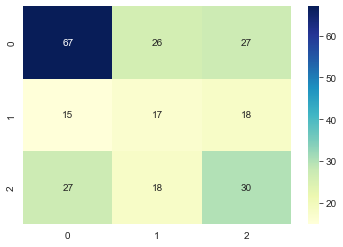

In [68]:
alpha_MLP = [i for i in 10.0 ** -np.arange(1,7)]

parameters_MLP = {'alpha': alpha_MLP}

MLP_model = MLPClassifier(solver='lbfgs',
                    random_state=1, hidden_layer_sizes=(20,100,100,20))
MLP_clf = GridSearchCV(MLP_model, parameters_MLP, cv=5, scoring="accuracy")

MLP_clf.fit(X_train, y_train)

print("Best Model:")
MLP_model = MLP_clf.best_estimator_
print(MLP_model)

MLP_predictions = MLP_model.predict(X_test)

# creating a confusion matrix
cm_MLP = confusion_matrix(y_test, MLP_predictions)
cm_MLP

sns.heatmap(cm_MLP, cmap="YlGnBu", annot=True)